# Spin-Orbit Coupling
**by <span style="color:darkgreen">Benedikt Maurer</span> and <span style="color:darkgreen">Andris Gulans</span> for [<span style="color:darkgoldenrod">exciting *neon*</span>](https://www.exciting-code.org/neon)**

<font size="2">(Jupyter notebook by <span style="color:darkgreen">Mara Voiculescu</span> & <span style="color:darkgreen">Martin Kuban</span>)</font>
<hr style="border:2px solid #DDD"> </hr>

**<span style="color:firebrick">Purpose</span>**:   In this tutorial you will learn how to calculate the electronic ground state with **spin-orbit coupling** (**SOC**). The effect of **SOC** is demonstrated by looking at the **band structure** of **GaAs**.
<hr style="border:2px solid #DDD"> </hr>

<div class="alert alert-block alert-warning">

**Table of Contents**

[0. General Preparation](#0)

[1. Theoretical Background: Spin-Orbit Coupling](#1)

[2. Electronic Band Structure of GaAs without SOC](#2)

[3. Electronic Band Structure of GaAs with SOC](#3)

[Literature](#4)

</div>

<a id='0'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">0. Before Starting</span>

**<span style="color:firebrick">Read the following paragraphs before starting with the rest of this tutorial!</span>**

Before running any Jupyter tutorials, please refer to the **`00_before_starting.md`** document on how to correctly set up the environment. This only needs to be done once. After which, the **venv** can be (re)activated from **`exciting`**'s root directory:

<div style="background-color: rgb(224, 224, 224);">

```bash
source tools/excitingjupyter/venv/excitingvenv/bin/activate
```

</div>

As a first step, you may create a running directory for the notebook.

In [1]:
%%bash
mkdir -p run_soc_tutorial

<a id='1'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">1. Theoretical Background: Spin-Orbit Coupling</span>

**Spin-orbit coupling** (**SOC**) is a relativistic contribution to the kinetic energy that describes the interaction of an electron's spin with its orbit. The spin-orbit term in the electron Hamiltonian is given by (see **<span style="color:firebrick">SOC-67</span>**):

$$
H_{SOC} = \frac{\boldsymbol{\hbar}}{4m_0^2c^2}(\boldsymbol{\sigma} \times \nabla V_{KS}) \cdot \boldsymbol{p}
$$

where $m_0$, $\boldsymbol{\sigma} = (\sigma_x, \sigma_y, \sigma_z)^T, V_{KS}$, and $\boldsymbol{p}$ are the electron mass, a vector of the Pauli matrices, the Kohn-Sham potential, and the electron's momentum, respectively. The strength of the **SOC** increases with the magnitude of the nuclear charge, and it may be crucially important to consider the **SOC** for materials with heavy atoms.

To demonstrate the effect of **SOC** on the electronic structure of **GaAs**, we calculate the **band structure** with and without **SOC** with **`exciting`** and compare them to each other.

<a id='2'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">2. Electronic Band Structure of GaAs without SOC</span>

At first, calculate the ground state and band structure of GaAs without SOC. To do so, create a new directory **GaAs-noSOC**:

In [2]:
%%bash
cd run_soc_tutorial
mkdir -p GaAs-noSOC
cd ..

Below is an example for the required input file (**input.xml**).

<span class="GaAs_noSOC"></span>
```xml
<input>
   <title>GaAs noSOC</title>
 
   <structure speciespath="$EXCITINGROOT/species">
      <crystal scale="10.683" >
         <basevect>  0.0  0.5  0.5 </basevect>
         <basevect>  0.5  0.0  0.5 </basevect>
         <basevect>  0.5  0.5  0.0 </basevect>
      </crystal>
 
      <species speciesfile='Ga.xml' rmt='2.0'>
         <atom coord="0.00 0.00 0.00"/>
      </species>
 
      <species speciesfile='As.xml' rmt='2.0'>
         <atom coord="0.25 0.25 0.25"/>
      </species>
   </structure>
 
   <groundstate
      do="fromscratch"
      xctype="GGA_PBE"
      rgkmax="6"
      gmaxvr="15"
      ngridk="4 4 4"
      swidth="1d-6"
      epsengy="1d-6"
      maxscl="40">
   </groundstate>
 
   <properties>
      <bandstructure>
         <plot1d>
            <path steps="1000">
               <point coord="1.0     0.0     0.0" label="Gamma"/>
               <point coord="0.625   0.375   0.0" label="K"/>
               <point coord="0.5     0.5     0.0" label="X"/>
               <point coord="0.0     0.0     0.0" label="Gamma"/>
               <point coord="0.5     0.0     0.0" label="L"/> 
            </path>
         </plot1d>
      </bandstructure>
   </properties>
 
</input>
```

The next step is writing the complete input as a string and saving it in your working directory as **input.xml**.

In [3]:
import os
from excitingjupyter.utilities import get_input_xml_from_notebook   

# Extract input file content from this notebook:
input_str = get_input_xml_from_notebook("tutorial_spin_orbit_coupling", "GaAs_noSOC")

# Write out the input as an XML file:
with open(os.path.join(os.getcwd(), 'run_soc_tutorial/GaAs-noSOC/input.xml'), "w") as fid:
    fid.write(input_str)

Before starting the calculation, remember to set the correct path for the **`exciting`** root directory (**$EXCITINGROOT**) to the one pointing to the place where the **`exciting`** directory is placed, using the command

In [4]:
%%bash
cd run_soc_tutorial/GaAs-noSOC
python3 -m excitingscripts.setup.excitingroot
cd ../..

In order to run **`exciting`**, you simply need to execute the **exciting_smp** binary in the subdirectory **GaAs-noSOC**. After a few seconds, the calculation should be finished. Here we used the <code>time</code> command before **exciting_smp** in order to get, at the end of the run, the elapsed time explicitly written on the screen.

In [ ]:
%%bash
cd run_soc_tutorial/GaAs-noSOC
time $EXCITINGROOT/bin/exciting_smp input.xml
cd ../..

You can monitor the progress of self-consistent cycle (SCF) by typing:
```bash
$ tail -f INFO.OUT
```

If the calculation was successful, the files **BAND.OUT**, **BANDLINES.OUT**, and **bandstructure.xml** exist.

You can visualize the band structure by by using the following commands:

In [6]:
%%bash
cd run_soc_tutorial
python3 -m excitingscripts.plot.band_structure -d GaAs-noSOC  -e -5 3  -z vbM
cd ..

<figure>
<img src=" 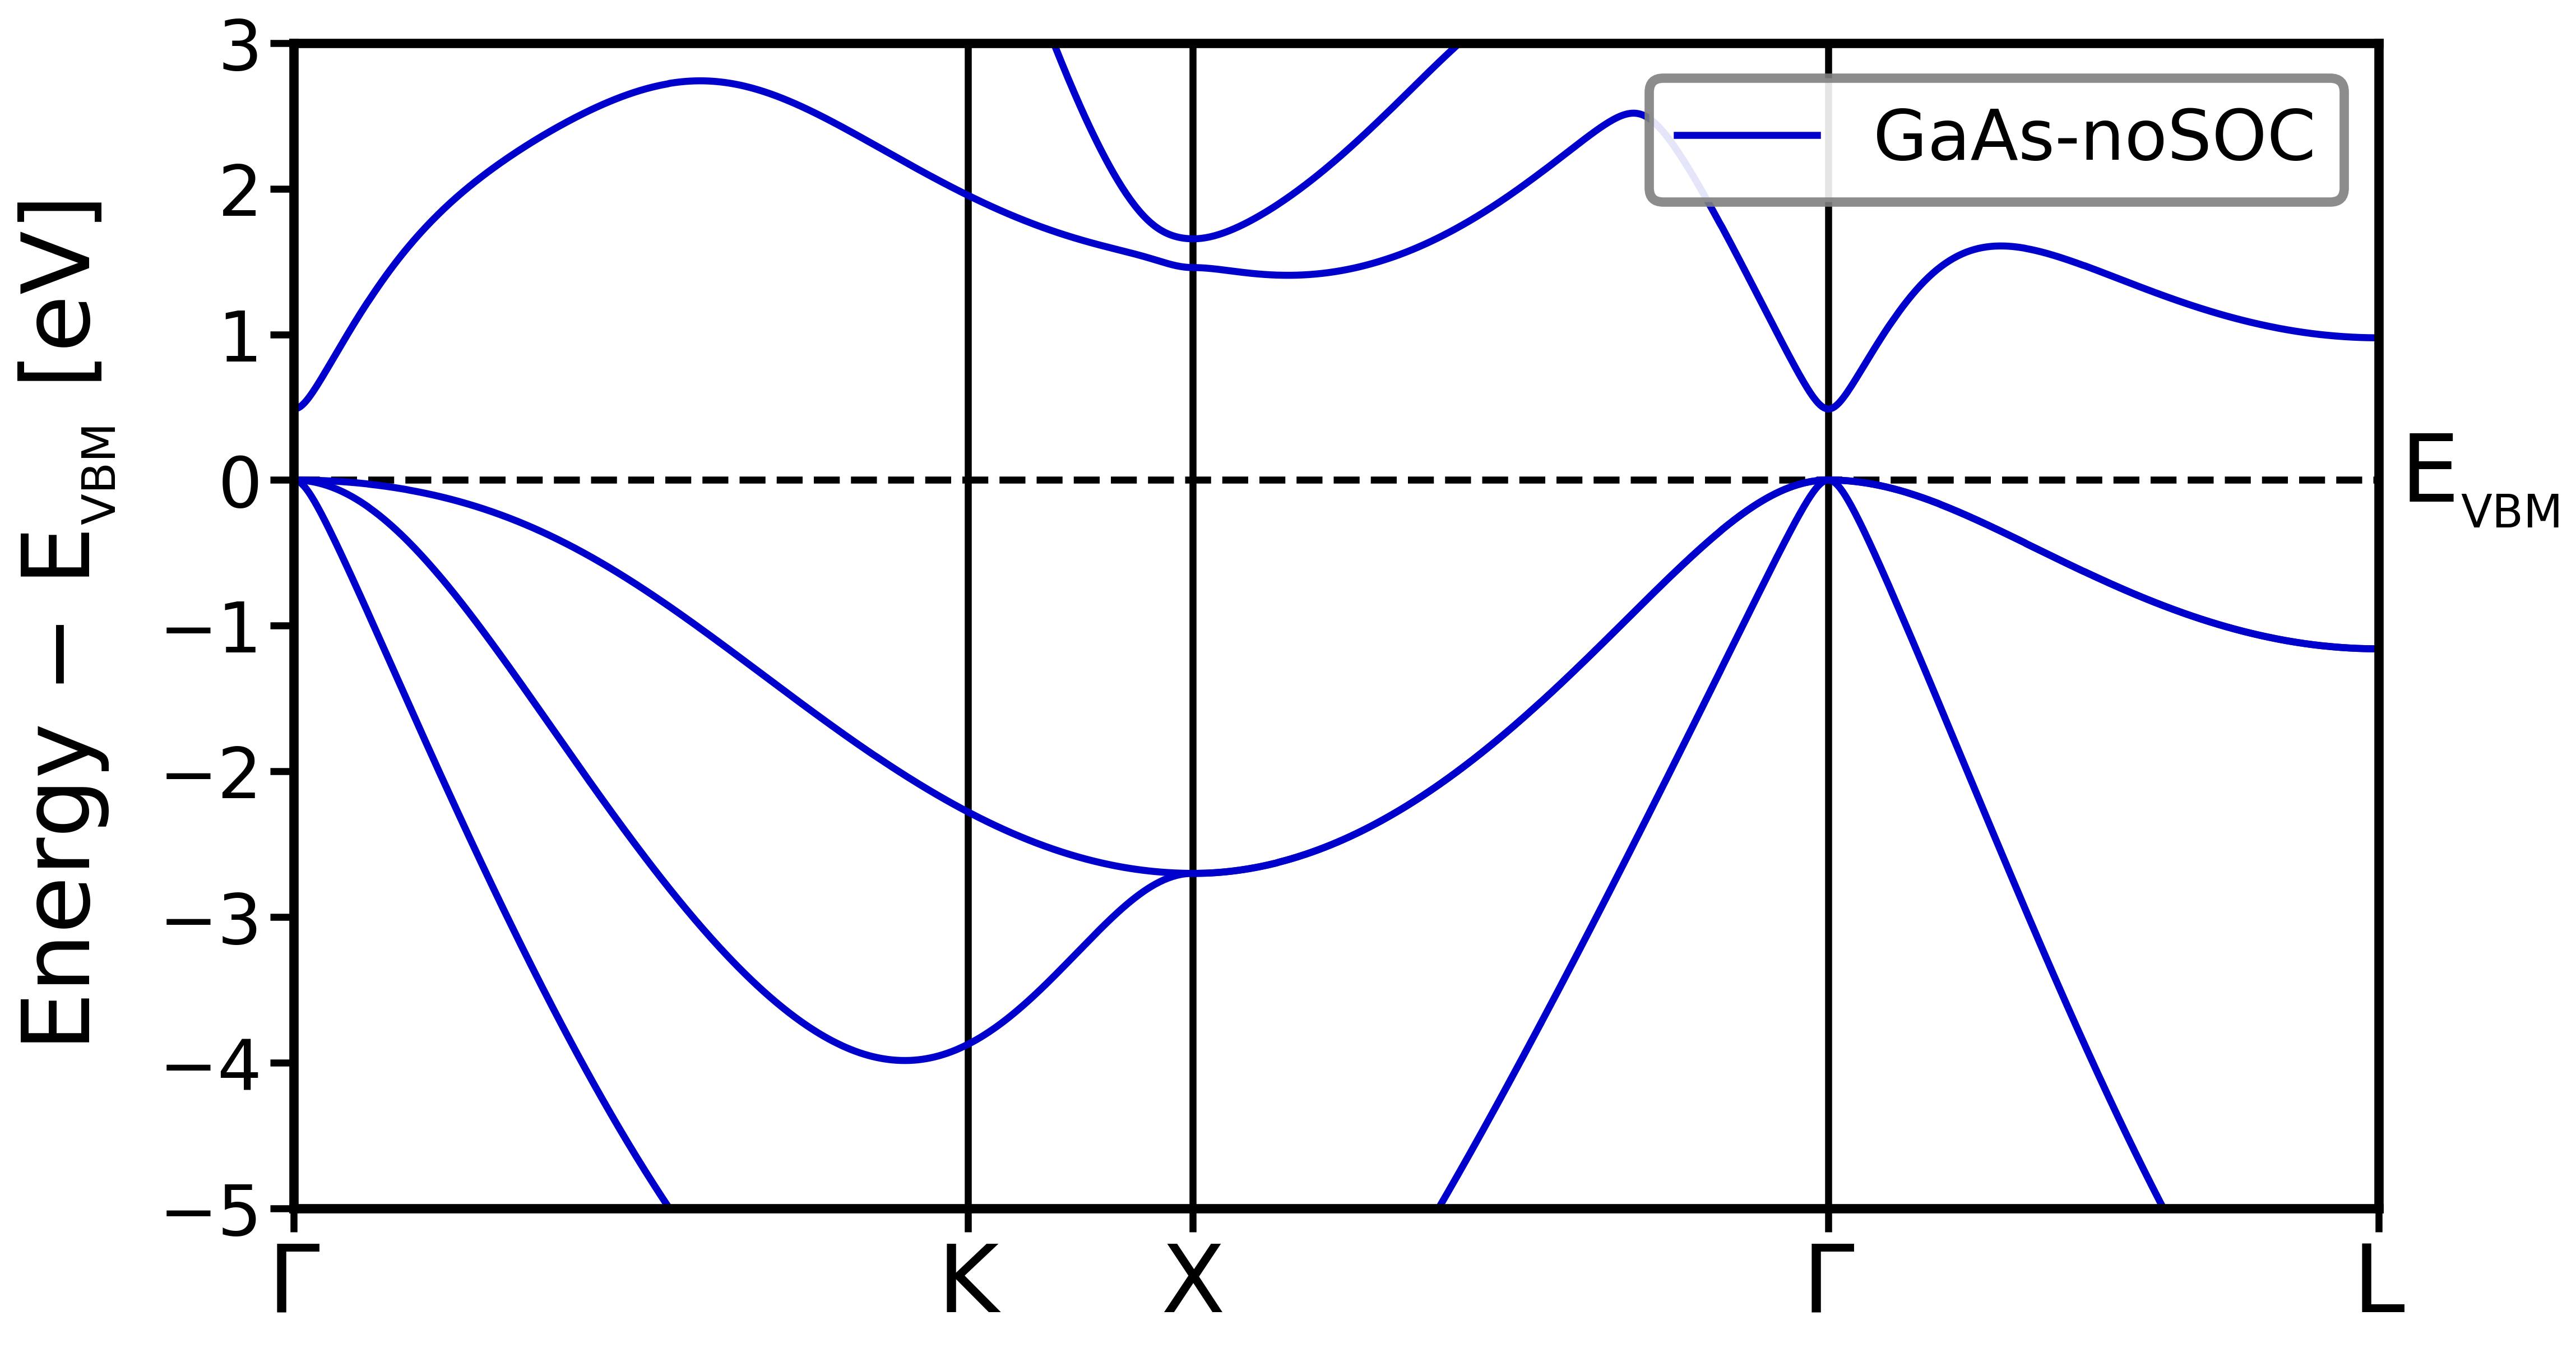" width="600" align="left"/>
</figure>

<a id='3'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">2. Electronic Band Structure of GaAs with SOC</span>

The ground state of **GaAs** without **SOC** can be used as starting point for the calculation with **SOC**. Create a new directory for the calculation with **SOC** and copy and paste all files from the old directory into the new one:

In [9]:
%%bash
cd run_soc_tutorial
mkdir -p GaAs-SOC
cp -a GaAs-noSOC/. GaAs-SOC
cd ..

To perform a ground-state calculation that includes **SOC**, the input file **input.xml** should be modified such that the <code><span style="color:green">title</span></code> is changed to **GaAs SOC** and the content of the <code><span style="color:green">groundstate</span></code> is adjusted as

```xml
...
   <groundstate
      do="fromfile"
      xctype="GGA_PBE"
      rgkmax="6"
      gmaxvr="15"
      ngridk="4 4 4"
      swidth="1d-6"
      epsengy="1d-6"
      maxscl="40"
      nempty="15">
 
      <spin spinorb="true"/>
   </groundstate>
...
```

In [10]:
 # The following lines modify the input.xml using Python
groundstate_soc = """
    <groundstate
      do="fromfile"
      xctype="GGA_PBE"
      rgkmax="6"
      gmaxvr="15"
      ngridk="4 4 4"
      swidth="1d-6"
      epsengy="1d-6"
      maxscl="40"
      nempty="15">

      <spin spinorb="true"/>
   </groundstate>
"""

index1=input_str.find("<groundstate")
index2=input_str.find("<properties>")

input_str_soc = input_str[:index1] + groundstate_soc +"\n"+ input_str[index2:]
input_str_soc = input_str_soc.replace('<title>GaAs noSOC</title>', ' <title>GaAs SOC</title>')

with open(os.path.join(os.getcwd(), 'run_soc_tutorial/GaAs-SOC/input.xml'), "w") as fid:
    fid.write(input_str_soc)

Do not forget to set the correct path for the **`exciting`** root directory:

In [11]:
%%bash
cd run_soc_tutorial/GaAs-SOC
python3 -m excitingscripts.setup.excitingroot
cd ../..

If you compare this to the previous <code><span style="color:green">groundstate</span></code> element, you will notice the following differences:

1. The <code><span style="color:mediumblue">do</span></code> attribute is set to <code><span style="color:firebrick">"fromfile"</span></code>. This enables **`exciting`** to use the self-consistent potential from the scalar-relativistic calculation as the starting point. As for <code><span style="color:firebrick">"skip"</span></code>, the files **STATE.OUT** and **EFERMI.OUT** from the calculation to skip have to be present in the directory.
2. A new element <code><span style="color:green">spin</span></code> is added to <code><span style="color:green">groundstate</span></code> with the attribute <code><span style="color:mediumblue">spinorb</span>=<span style="color:firebrick">"true"</span></code>. This enables **SOC** for the ground state.
3. The attribute <code><span style="color:mediumblue">nempty</span>=<span style="color:firebrick">"15"</span></code> has been added to the <code><span style="color:green">groundstate</span></code> element. This attribute defines how many unoccupied (empty) states are considered for the solution of the electronic ground state with **SOC**. **<span style="color:firebrick">When SOC is taken into account, a proper choice of the parameter nempty is fundamental for converged results!</span>**

Use the following commands to run the calculation:

In [ ]:
%%bash
cd run_soc_tutorial/GaAs-SOC
time $EXCITINGROOT/bin/exciting_smp input.xml
cd ../..

Note, that the output file **INFO.OUT** contains a new section called **Moments**: inside the **SCF** information.

```
 Moments :
     interstitial                 :     0.00000000     0.00000000     0.00000000
     moment in muffin-tin spheres :
         atom     1    As         :     0.00000000     0.00000000    -0.00000000
         atom     2    Ga         :    -0.00000000    -0.00000000    -0.00000000
     total moment in muffin-tins  :    -0.00000000    -0.00000000    -0.00000000
     total moment                 :    -0.00000000    -0.00000000    -0.00000000
```

This section shows the moments of the interstitial and the muffin-tin part of the solution. If this section is present, **SOC** is included into the solution of the ground state.

If you did not change anything else than the <code><span style="color:green">groundstate</span></code> element, the band structure is calculated already and you can compare it to the band structure of the calculation without **SOC**.

In [13]:
%%bash
cd run_soc_tutorial
python3 -m excitingscripts.plot.band_structure -d GaAs-noSOC GaAs-SOC  -e -5 3  -z vbM
cd ..

Electronic band-structure data are now taken from both **GaAs-noSOC** and **GaAs-SOC** directories. The result is saved to **PLOT.png** and should look like the following image:

<figure>
<img src=" 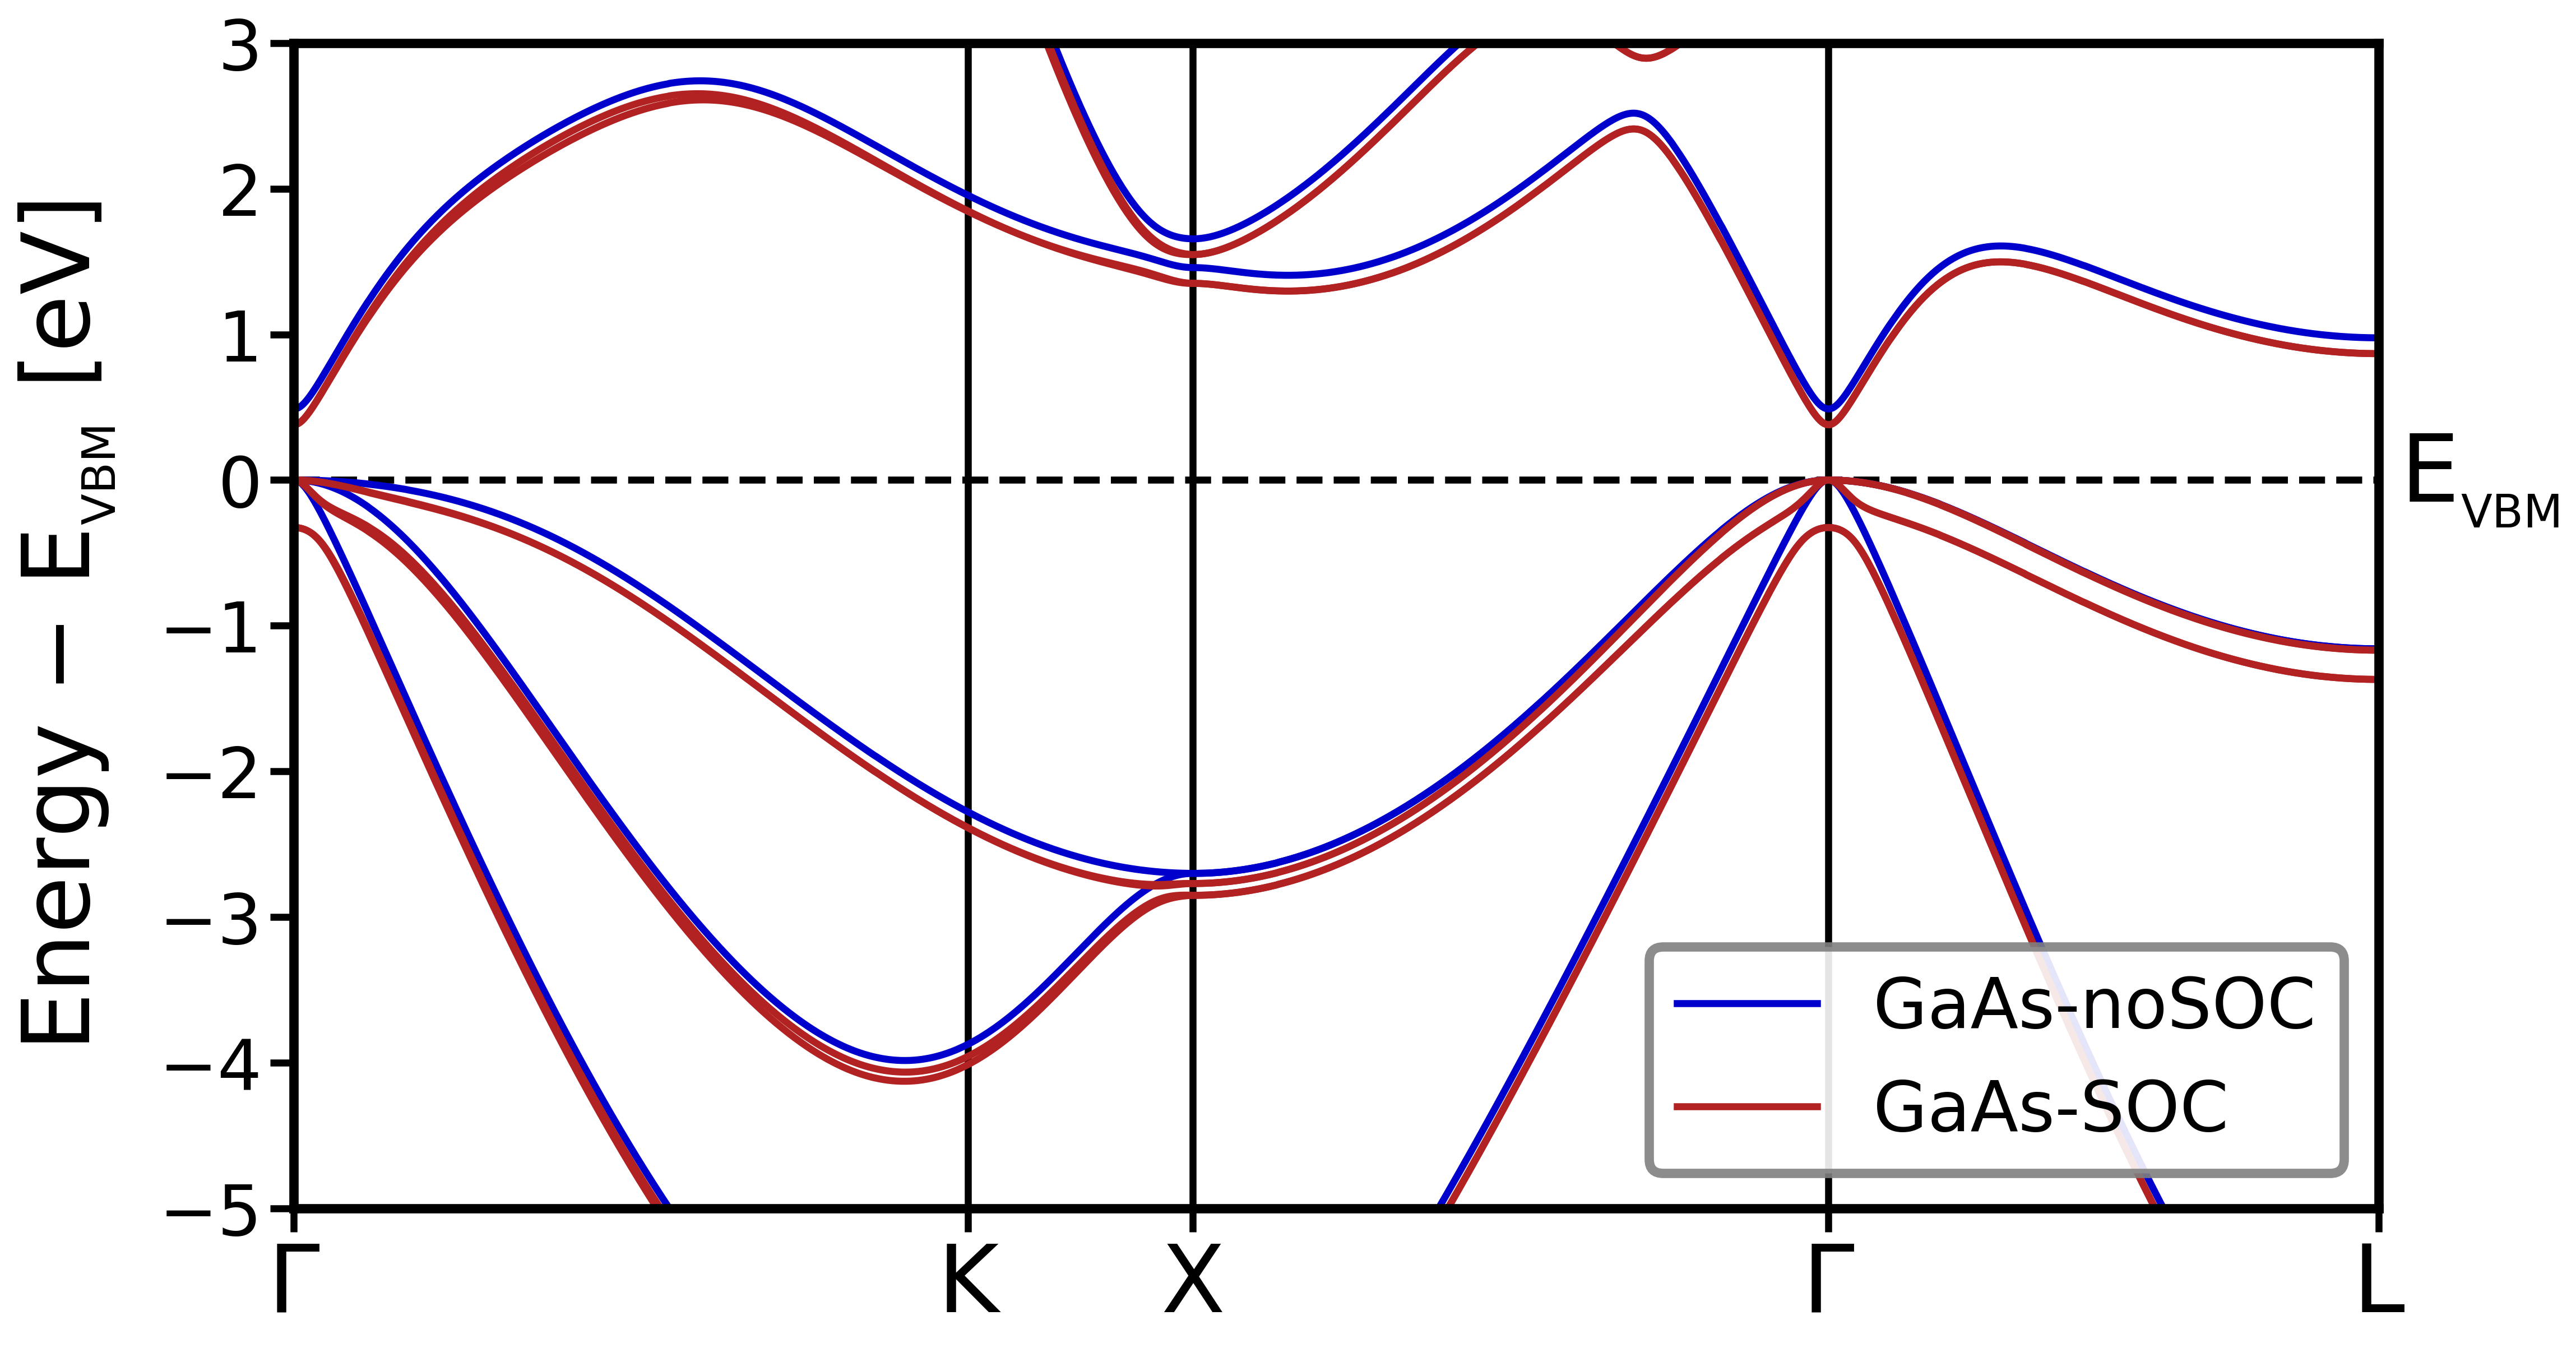" width="600" align="left"/>
</figure>

Comparing the band dispersion curves from the two calculations, we notice a few features introduced by the SOC.

1. The band gap $E_g$ slightly decreases.
2. The 3 top valence bands lose their triple degeneracy at the **Γ**-point, and we can recognize the heavy and light hole bands as well as the split-off band. The difference between the light-hole (or heavy-hole) and the split-off bands is known as the spin-orbit splitting $\Delta_{SO}$.
3. Some bands lose their spin-degeneracy as **GaAs** does not have an inversion symmetry. This can be verified by looking at the electronic band structure close to the **Γ**-point along the **X->Γ->L** directions. This feature is more visible in the plot which is produced by changing the energy window as follows:


In [15]:
%%bash
cd run_soc_tutorial
python3 -m excitingscripts.plot.band_structure -d GaAs-noSOC GaAs-SOC  -e -1.5 1.5  -z vbM  -k 0.70 0.775  -s 0.5
cd ..

<figure>
<img src=" 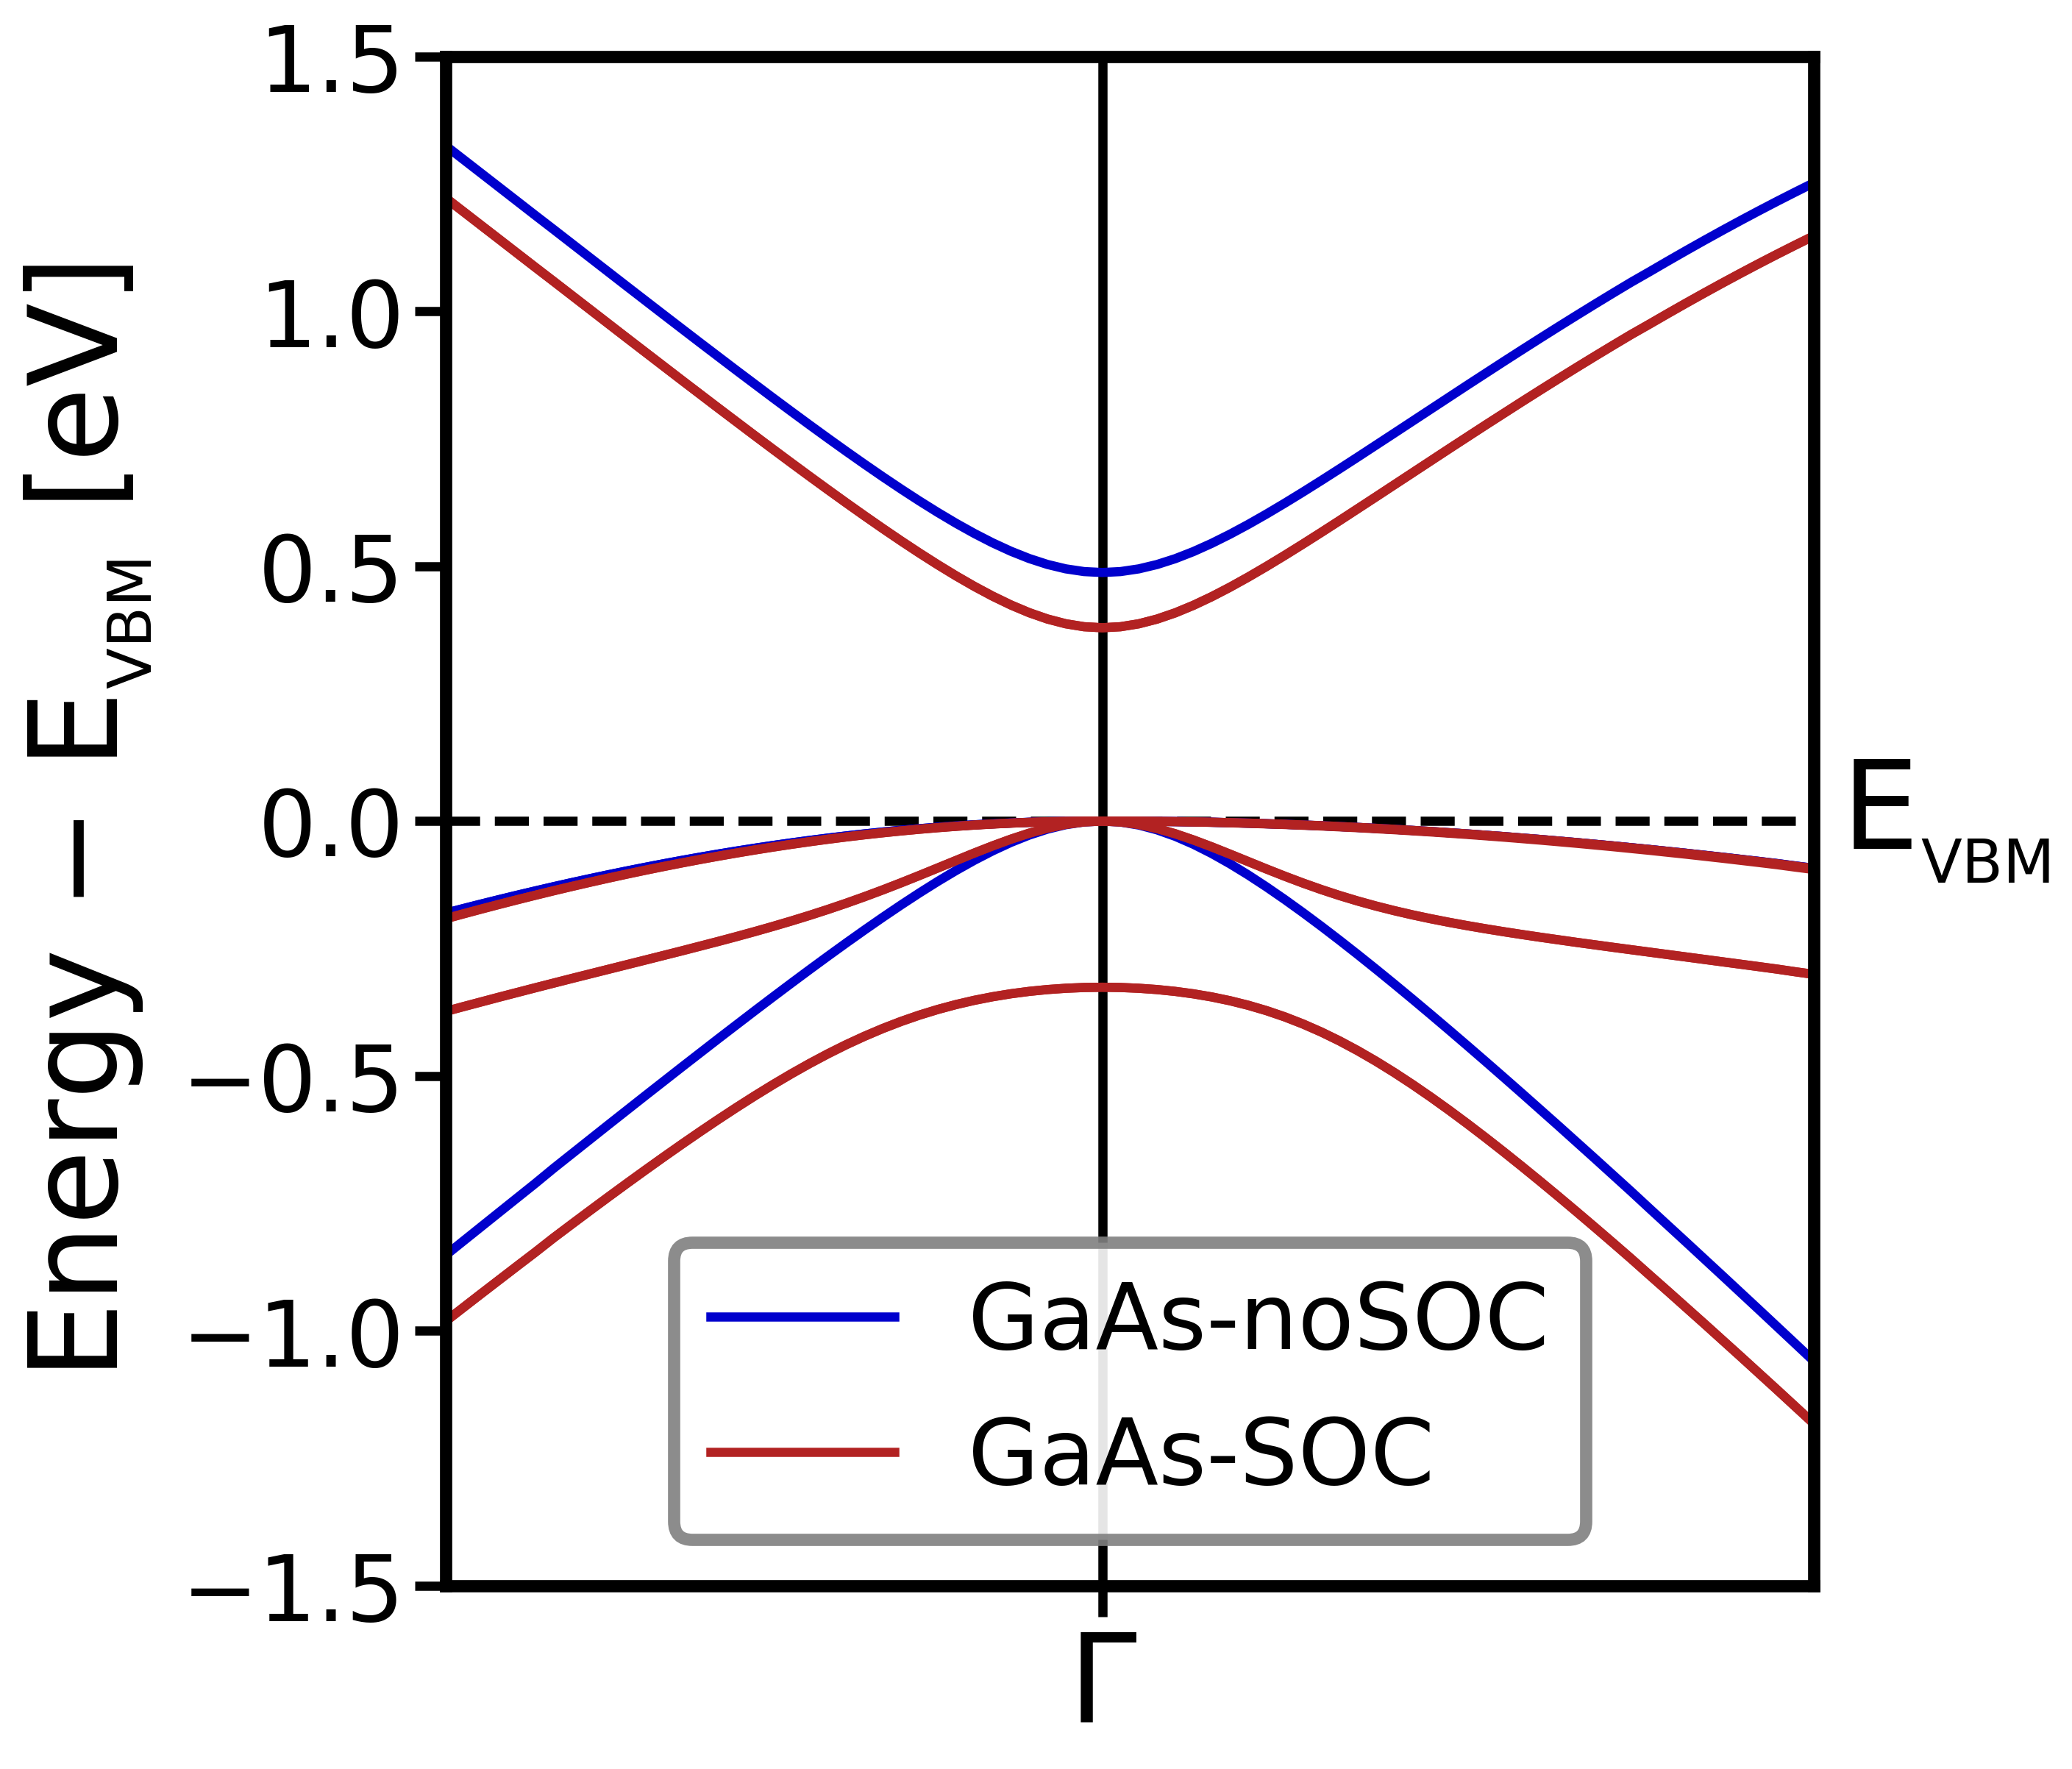" width="400" align="left"/>
</figure>

The plot is useful for a qualitative analysis, but it is more convenient to look at the output files **EIGVAL.OUT** or **BAND.OUT** inside the directory **GaAs-SOC** for extracting the numbers. **EIGVAL.OUT** contains Kohn-Sham eigenvalues at each **k**-point considered in the self-consistent calculation. If you open this file in the directory with the **SOC** calculation, you will find the following data:

```
    10 : nkpt
    40 : nstsv

     1   0.000000000       0.000000000       0.000000000     : k-point, vkl
 (state, eigenvalue and occupancy below)
...
    21 -0.2881291119       1.000000000    
    22 -0.2881291119       1.000000000    
    23  0.1721175534       1.000000000    
    24  0.1721175534       1.000000000    
    25  0.1840659516       1.000000000    
    26  0.1840659521       1.000000000    
    27  0.1840662097       1.000000000    
    28  0.1840662102       1.000000000    
    29  0.1979968334       0.000000000    
    30  0.1979968334       0.000000000    
    31  0.3106234272       0.000000000    
    32  0.3106234272       0.000000000    
    33  0.3173384018       0.000000000    
    34  0.3173384023       0.000000000  
...
```

The indices of the bands are as follows:

- 23-24 — the split-off band,
- 25-26 — the light hole band,
- 27-28 — the heavy hole band,
- 29-30 — the lowest conduction band.

Taking into account that the energies are given in the atomic units (Hartrees), the Kohn-Sham band gap is $E_g$ = 0.38 eV, which is much smaller than the experimental value $E_g^{exp}$ = 1.42 eV (see **<span style="color:firebrick">GaAs-gap</span>**). The obtained spin-orbit splitting is $\Delta_{SO}$ = 0.33 eV. Unlike the band gap, it is in a good agreement with experiment ($\Delta_{SO}^{exp}$ = 0.34 eV).

<a id='4'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">Literature</span>

- **<span style="color:firebrick">SOC-67</span>**: The form of $H_{SOC}$ in the given form is derived in J. J. Sakurai, Advanced quantum mechanics (Addison-Wesley, Reading, MA, 1967) pp. 62, 63, 1, 4.
- **<span style="color:firebrick">GaAs-gap</span>**: T.E. Schlesinger, **<span style="color:firebrick">Gallium Arsenide</span>** in Encyclopedia of Materials: Science and Technology, 2001

<hr style="border:2px solid #DDD"> </hr>